# Data Wrangle Project

## Table of Contents
 <ul>
<li><a href="#archive">Twitter Archive</a></li>
<li><a href="#predict">Image Prediction</a></li>
<li><a href="#api">Twitter API Query</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#sav">Store, Analyze and Visualize</a></li>
<li><a href="#sum">Summary</a></li>
 </ul>

In [1]:
#load libraries
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import glob
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

<a id='archive'></a>
## Twitter Archive

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [4]:
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

* Redundant contents in the source column.

In [5]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* The data type of datetime is a string.
* Some IDs are float.
* Missing values.

In [6]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
491,813800681631023104,NaN,NaN,2016-12-27 17:36:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sky. She's learning how to roll her R'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813800681...,12,10,Sky,None,None,None,None
1699,680970795137544192,NaN,NaN,2015-12-27 04:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I thought I made this very clear. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680970795...,9,10,None,None,None,None,None
1836,676098748976615425,NaN,NaN,2015-12-13 17:57:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely rare pup here. Very religious. Alway...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676098748...,3,10,None,None,None,None,None
1895,674742531037511680,6.747400e+17,4.196984e+09,2015-12-10 00:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Some clarification is required. The dog is sin...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
841,766864461642756096,NaN,NaN,2016-08-20 05:08:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs... this is a ...,7.599238e+17,4.196984e+09,2016-08-01 01:28:46 +0000,https://twitter.com/dog_rates/status/759923798...,10,10,None,None,None,None,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
2160,669567591774625800,NaN,NaN,2015-11-25 17:25:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kollin. He's a Parakeetian Badminton from...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669567591...,9,10,Kollin,None,None,None,None
2114,670433248821026816,NaN,NaN,2015-11-28 02:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sam. He's trying to escape the inordin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670433248...,10,10,Sam,None,None,None,None
451,818627210458333184,NaN,NaN,2017-01-10 01:15:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wafer. He represents every fiber of my be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818627210...,13,10,Wafer,None,None,None,None
2281,667369227918143488,NaN,NaN,2015-11-19 15:49:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a neat pup. Very white. Cool shad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667369227...,10,10,None,None,None,None,None


In [7]:
df_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [8]:
df_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

* Some rating numerators and denominators are out of range.

In [9]:
#find strange numerators and denominators
df_archive[df_archive.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [10]:
df_archive[df_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [11]:
#find unactual names
df_archive[df_archive.name.str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


* Some names are detected as other words.

In [12]:
#find duplicates 
df_archive.duplicated().sum()

0

<a id='predict'></a>
## Image Prediction

In [13]:
#download tsv file from udacity server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
for image_predictions in glob.glob('image_predictions/*.txt'):
    with open(image_predictions, encoding = 'utf-8') as file:
        file.write(response.content)
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [14]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* p1, p2, p3 are strings.

In [17]:
#find duplicates
df_image_predictions.duplicated().sum()

0

In [18]:
#find retweets
df_image_predictions['jpg_url'].value_counts().head()

https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg    2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg    2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg    2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg    2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg    2
Name: jpg_url, dtype: int64

* Same picture with different ids are retweets.

<a id='api'></a>
## Twitter API Query

In [19]:
import tweepy

consumer_key = 'YOUR KEY'
consumer_secret = 'YOUR SECRET KEY'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR SECRET ACCESS TOKEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [20]:
tweet_ids = df_archive['tweet_id']
tweets_cant_find = []#list of tweets can't find
tweets = []          #list of tweets

start = time.time()

for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] #tweet number of favorites
        retweets = tweet['retweet_count']
        date_time = tweet['created_at']
        
        tweets.append({'tweet_id': int(tweet_id),
                       'favorites': int(favorites),
                       'retweets': int(retweets),
                       'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        tweets_cant_find.append(tweet_id)
        
end = time.time()

Rate limit reached. Sleeping for: 733
Rate limit reached. Sleeping for: 734


In [21]:
#create dataframes and save to file
df_api = pd.DataFrame(tweets, columns = ['date_time', 'tweet_id', 'retweets', 'favorites'])
df_api.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [22]:
df_api.head()

,date_time,tweet_id,retweets,favorites
0,2017-08-01 16:23:56,892420643555336193,7237,34679
1,2017-08-01 00:17:27,892177421306343426,5420,30048
2,2017-07-31 00:18:03,891815181378084864,3580,22620
3,2017-07-30 15:58:51,891689557279858688,7447,37956
4,2017-07-29 16:00:24,891327558926688256,7994,36222


In [23]:
df_api.tail()

,date_time,tweet_id,retweets,favorites
2323,2015-11-16 00:24:50,666049248165822465,37,92
2324,2015-11-16 00:04:52,666044226329800704,119,254
2325,2015-11-15 23:21:54,666033412701032449,38,105
2326,2015-11-15 23:05:30,666029285002620928,41,117
2327,2015-11-15 22:32:08,666020888022790149,439,2330


In [24]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 4 columns):
date_time    2328 non-null object
tweet_id     2328 non-null int64
retweets     2328 non-null int64
favorites    2328 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [25]:
#find duplicates
df_api.duplicated().sum()

0

### Issue Types

> **Quality Issues**

**df_archive**

* The data type of the timestamps should be datetime.
* IDs should be strings or integers.
* Missing values found in several columns.
* The source column should be more readable.
* Some rating numerators and denominators are not real ratings.
* Some names are detected as other words.

**df_image_predictions**

* p1, p2, p3 should be categorical instead of strings.
* Some pictures are retweets.

> **Tidiness Issues**

* The dog stage spread across 4 columns - doggo, floofer, pupper, puppo.
* Information about tweets is spread across three different dataframes. 

<a id='clean'></a>
## Cleaning Data

In [26]:
df_new = df_archive.copy()
df_image_predictions_new = df_image_predictions.copy()
df_api_new = df_api.copy()

### Tidiness Issues

#### Define

1. Merging the 3 dataframes into one.

#### Code

In [27]:
df_new = pd.merge(left = df_new, 
                  right = df_api_new, 
                  left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

In [28]:
df_new = df_new.merge(df_image_predictions_new, on = 'tweet_id', how = 'inner')

#### Test

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 31 columns):
tweet_id                      2058 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2058 non-null object
source                        2058 non-null object
text                          2058 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2058 non-null object
rating_numerator              2058 non-null int64
rating_denominator            2058 non-null int64
name                          2058 non-null object
doggo                         2058 non-null object
floofer                       2058 non-null object
pupper                        2058 non-null object
puppo                         2058 non-null object
date_time                     2058 

#### Define

2. Combining different dog stages into one column. 

>* Count the number of all stages.
>* Merge the stage columns and create a new column 'stage'.
>* Inspect the cells not within the four stages and redefine them.

#### Code

In [30]:
df_new.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1740
1,None,None,None,puppo,23
2,None,None,pupper,None,210
3,None,floofer,None,None,7
4,doggo,None,None,None,65
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,11
7,doggo,floofer,None,None,1


In [31]:
df_new['stage'] = df_new.doggo + df_new.floofer + df_new.pupper + df_new.puppo

df_new.loc[df_new.stage == 'NoneNoneNoneNone', 'stage'] = 'None'
df_new.loc[df_new.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
df_new.loc[df_new.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
df_new.loc[df_new.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
df_new.loc[df_new.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
df_new.loc[df_new.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_new.loc[df_new.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_new.loc[df_new.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [32]:
dogpupo = df_new[df_new.stage.str.contains('doggoNoneNonepuppo')]
print(dogpupo.text, dogpupo.expanded_urls)

151    Here's a puppo participating in the #ScienceMa...
Name: text, dtype: object 151    https://twitter.com/dog_rates/status/855851453...
Name: expanded_urls, dtype: object


In [33]:
df_new.loc[df_new.index.isin([151]),'stage'] = 'puppo'

In [34]:
dogpupr = df_new[df_new.stage.str.contains('doggoNonepupperNone')]
print(dogpupr.text, dogpupr.expanded_urls)

357    This is Dido. She's playing the lead role in "...
420    Here we have Burke (pupper) and Dexter (doggo)...
448    Like doggo, like pupper version 2. Both 11/10 ...
454    This is Bones. He's being haunted by another d...
556    This is Pinot. He's a sophisticated doggo. You...
616    RT @dog_rates: Like father (doggo), like son (...
654    RT @dog_rates: This is just downright precious...
710    Meet Maggie &amp; Lila. Maggie is the doggo, L...
766    Please stop sending it pictures that don't eve...
857    This is just downright precious af. 12/10 for ...
903    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object 357    https://twitter.com/dog_rates/status/817777686...
420    https://twitter.com/dog_rates/status/808106460...
448    https://twitter.com/dog_rates/status/802265048...
454    https://twitter.com/dog_rates/status/801115127...
556    https://twitter.com/dog_rates/status/785639753...
616    https://twitter.com/dog_rates/status/733109485...
654  

In [35]:
df_new.loc[df_new.index.isin([357]),'stage'] = 'pupper'
df_new.loc[df_new.index.isin([420]),'stage'] = 'multiple'
df_new.loc[df_new.index.isin([448]),'stage'] = 'multiple'
df_new.loc[df_new.index.isin([454]),'stage'] = 'pupper'
df_new.loc[df_new.index.isin([556]),'stage'] = 'doggo'
df_new.loc[df_new.index.isin([616]),'stage'] = 'multiple'
df_new.loc[df_new.index.isin([654]),'stage'] = 'multiple'
df_new.loc[df_new.index.isin([710]),'stage'] = 'multiple'
df_new.loc[df_new.index.isin([766]),'stage'] = 'doggo'
df_new.loc[df_new.index.isin([857]),'stage'] = 'multiple'
df_new.loc[df_new.index.isin([903]),'stage'] = 'multiple'

In [36]:
dogflo = df_new[df_new.stage.str.contains('doggoflooferNoneNone')]
print(dogflo.text, dogflo.expanded_urls);

157    At first I thought this was a shy doggo, but i...
Name: text, dtype: object 157    https://twitter.com/dog_rates/status/854010172...
Name: expanded_urls, dtype: object


In [37]:
df_new.loc[df_new.index.isin([157]),'stage'] = 'doggo'

In [38]:
df_new = df_new.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 28 columns):
tweet_id                      2058 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2058 non-null object
source                        2058 non-null object
text                          2058 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2058 non-null object
rating_numerator              2058 non-null int64
rating_denominator            2058 non-null int64
name                          2058 non-null object
date_time                     2058 non-null object
retweets                      2058 non-null int64
favorites                     2058 non-null int64
jpg_url                       2058 non-null object
img_num                       2058 no

### Quality Issues

#### Define

3. Drop NaNs, duplicates and unmeaningful columns.

#### Code

In [40]:
# delete retweets
df_new = df_new[pd.isnull(df_new.retweeted_status_id)]

# delete unwanted columns
df_new = df_new.drop(['in_reply_to_status_id',
                      'in_reply_to_user_id',
                      'retweeted_status_id', 
                      'retweeted_status_user_id',
                      'retweeted_status_timestamp', 
                      'date_time'], axis = 1)

# delete retweets
df_new = df_new.drop_duplicates(subset = ['jpg_url'])

#### Test

In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2057
Data columns (total 22 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null object
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
retweets              1986 non-null int64
favorites             1986 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null bool

#### Define

4. Make the source content more readable.

#### Code

In [42]:
df_new['source'] = df_new['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [43]:
df_new.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7237,34679,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5420,30048,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3580,22620,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7447,37956,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,7994,36222,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


#### Define

5. Refine columns in image prediction.

#### Code

In [44]:
# store the true algo with it's level of confidence
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('None')
        confidence.append(0)

df_new.apply(get_prediction_confidence, axis=1)
df_new['prediction'] = prediction
df_new['confidence'] = confidence

In [45]:
# drop the not required columns of image prediction information
df_new = df_new.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#### Test

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2057
Data columns (total 14 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null object
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
retweets              1986 non-null int64
favorites             1986 non-null int64
jpg_url               1986 non-null object
stage                 1986 non-null object
prediction            1986 non-null object
confidence            1986 non-null float64
dtypes: float64(1), int64(5), object(8)
memory usage: 232.7+ KB


#### Define

6. Get the correct dog gender from text column by filtering common phrases and assigning a gender. Using 'None' if no gender can be inferred from text.

#### Code

In [47]:
# loop on all the texts and check if it has one of pronouns of male or female
male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in df_new['text']:
    if any(map(lambda v:v in male, text.split())):
        gender.append('male')
    elif any(map(lambda v:v in female, text.split())):
        gender.append('female')
    else:
        gender.append('None')

#add a new column for dog gender
df_new['gender'] = gender

#### Test

In [48]:
df_new.gender.value_counts()

None      1129
male       633
female     224
Name: gender, dtype: int64

#### Define

7. Fix rating numerator and denominators that are not actually ratings.

#### Code

In [49]:
# view all occurences where there are more than one #/# in 'text' column
text_ratings_fix = df_new[df_new.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [50]:
for entry in text_ratings_fix:
    mask = df_new.text == entry
    col_1 = 'rating_numerator'
    col_2 = 'rating_denominator'
    df_new.loc[mask, col_1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_new.loc[mask, col_2] = 10

In [51]:
# view tweets with decimals in rating in 'text' column
df_new[df_new.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,stage,prediction,confidence,gender
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,8530,41278,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082,female
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,5916,17816,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321,male
603,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,1537,6365,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718,None
1437,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,456,1630,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627,None


In [52]:
# set correct numerators for specific tweets
rating = df_new.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand = True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_new['rating_numerator'] = rating['rating_numerator'].astype(float)
df_new['rating_denominator'] = rating['rating_denominator'].astype(float)

#### Test

In [53]:
df_new[df_new.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,stage,prediction,confidence,gender
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,8530,41278,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082,female
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,5916,17816,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321,male
603,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,1537,6365,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718,None
1437,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,456,1630,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627,None


#### Define

8. Remove unmeaningful names with lowercase.

#### Code

In [54]:
df_new = df_new[df_new.name.str[0].str.isupper().fillna(False)]

#### Test

In [55]:
df_new[df_new.name.str[0].str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,stage,prediction,confidence,gender


#### Define

9. Correct all datatypes.

#### Code

In [56]:
df_new['tweet_id'] = df_new['tweet_id'].astype(str)
df_new['timestamp'] = pd.to_datetime(df_new.timestamp)
df_new['source'] = df_new['source'].astype('category')
df_new['stage'] = df_new['stage'].astype('category')
df_new['gender'] = df_new['gender'].astype('category')

#### Test

In [57]:
df_new.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
retweets                       int64
favorites                      int64
jpg_url                       object
stage                       category
prediction                    object
confidence                   float64
gender                      category
dtype: object

<a id='sav'></a>
## Store, Analyze and Visualize

#### Store

In [58]:
# Save clean DataFrame to csv file
df_new.drop(df_new.columns[df_new.columns.str.contains('Unnamed',case = False)],axis = 1)
df_new.to_csv('twitter_archive_master', encoding = 'utf-8', index=False)

### 1. The most popular dog stage: What kind of dog stage have the most tweets?

In [59]:
df_new['stage'].value_counts()

None        1595
pupper       196
doggo         63
puppo         23
floofer        7
multiple       4
Name: stage, dtype: int64

#### Visualize

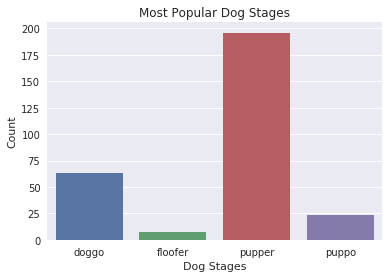

In [60]:
sns.set(style = 'darkgrid')
sns.countplot(data = df_new, x = 'stage', order = ['doggo', 'floofer', 'pupper', 'puppo'])
plt.xlabel('Dog Stages')
plt.ylabel('Count')
plt.title('Most Popular Dog Stages');

#### Analyses

Besides the 'Multiple' and 'None' options, the most famous stage of dogs is pupper, which are the young ones. Looks like most people are attracted by their small and cute appearance. The least famous stage is the floofers.

### 2. Well predicted pictures

In [61]:
df_new['prediction'].value_counts()[:10]

None                  290
golden_retriever      152
Labrador_retriever    102
Pembroke               91
Chihuahua              89
pug                    58
toy_poodle             46
chow                   45
Pomeranian             39
Samoyed                39
Name: prediction, dtype: int64

In [62]:
df_new.nlargest(20, ['confidence']).loc[ : , ['prediction', 'confidence']][:10]

,prediction,confidence
689,chow,0.999953
1193,Labrador_retriever,0.999885
1582,chow,0.999876
1044,chow,0.999837
377,dalmatian,0.999828
607,chow,0.999823
269,Old_English_sheepdog,0.999715
1447,pug,0.999365
28,French_bulldog,0.999201
84,pug,0.999120


In [63]:
breed = df_new.groupby('prediction', as_index = False)['confidence'].mean().sort_values(by = ['confidence'], ascending = False)[:10]
breed

,prediction,confidence
94,komondor,0.958819
83,clumber,0.946718
74,black-and-tan_coonhound,0.854861
92,keeshond,0.844431
80,bull_mastiff,0.815618
6,Bernese_mountain_dog,0.778240
13,Brittany_spaniel,0.775591
7,Blenheim_spaniel,0.734041
18,Doberman,0.724541
56,Samoyed,0.714809


#### Visualize

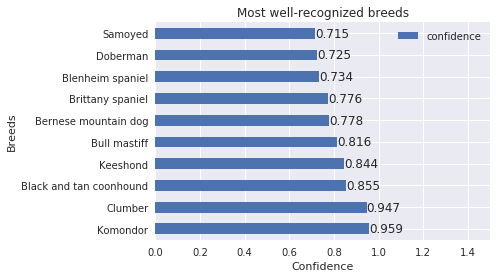

In [64]:
breeds = ['Komondor', 
          'Clumber', 
          'Black and tan coonhound', 
          'Keeshond', 'Bull mastiff', 
          'Bernese mountain dog', 
          'Brittany spaniel', 
          'Blenheim spaniel', 
          'Doberman', 
          'Samoyed'] #rename the elements

plt.figure(figsize = (12, 8))
ax = breed.plot(kind = 'barh')
ax.set_title('Most well-recognized breeds')
ax.set_xlabel('Confidence')
ax.set_ylabel('Breeds')
ax.set_yticklabels(breeds)
ax.set_xlim(0, 1.5) #expand xlim to make labels easier to read

rects = ax.patches
for rect in rects:
    #get xy placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    #use x as label and format number with three decimal place
    label = "{:.3f}".format(x_value)
    
    plt.annotate(
        label,                     
        (x_value, y_value),         
        va = 'center',                #vertically center label
        ha = 'left');                 #horizontally align label 

#### Analyses

Although there are many pictures that couldn't predict the dogs from them (labeled as 'None'), the top ten pictures which have the highest average confidence to tell the breed of dogs, Golden retriever has the most tweets, but Chow have the highest confidence value, and Komondor is the most well-recognized.

### 3. Total favourites and retweets

#### Visualize

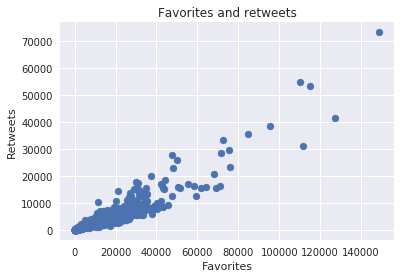

In [65]:
plt.scatter(df_new['favorites'], df_new['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Favorites and retweets');

#### Analyses

There is a positive correlation between favourites and retweets.

### 4. Pupper favourites and retweets

In [66]:
#create month column
df_new['month'] = pd.to_datetime(df_new.timestamp, format = '%m', errors = 'coerce').dt.month

#select the pupper stage
pupper = df_new[df_new.stage == 'pupper']
pupper_sum = pupper.groupby('month', as_index = False)[['favorites', 'retweets']].mean().sort_values(by = ['month'])
cols = ['favorites', 'retweets']
pupper_sum[cols] = pupper_sum[cols].round(0).astype(int)

#transfer integer of month column to names
pupper_sum['month'] = pd.to_datetime(pupper_sum['month'], format = '%m').dt.month_name().str.slice(stop = 3)
pupper_sum

,month,favorites,retweets
0,Jan,4859,1980
1,Feb,5282,1415
2,Mar,9168,2440
3,Apr,7742,2039
4,May,17278,4900
5,Jun,11469,2868
6,Jul,8751,2067
7,Aug,6839,2072
8,Sep,10081,3098
9,Nov,9640,2876


#### Visualize

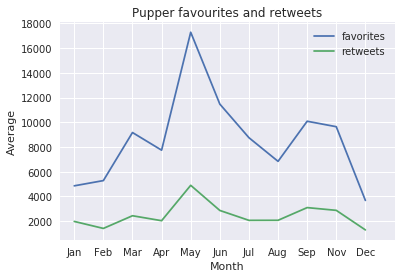

In [67]:
pupper_sum.plot(kind = 'line', x = 'month', y = ['favorites','retweets'], xticks = range(0,12))
plt.xlabel('Month')
plt.ylabel('Average')
plt.title('Pupper favourites and retweets')
plt.show();

#### Analyses

Choosing pupper to take a deeper look in the average counts of favourites and retweets, the lines peaked at May and bottomed up in December.
Not to view every pictures of the tweets, we can conjecture that most of them were taken outdoors, when summer(May) is the best timing to walk a dog everywhere and (Winter)December is when people choose to stay at home.
It is interesting to see that despite 196 pupper data, also the stage with the most tweets, there are no information shown in October.

<a id='sum'></a>
## Summary

Looking from the insights above, we can see that pupper is the most popular stage of dog, Golden retriever might have a large proportion in it, and Komondor is the most well-recognized of all breeds. Then we found that there is a positive correlation between favourites and retweets, we want to know how it perform in the most famous stage, and it show that both favourites and retweets peaked at May and bottomed up at December. We summarized that this might happen in outdoor activities. We also found out there are no tweets about pupper in October.